# NetworkX 

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks


In [1]:
%pylab inline
import networkx as nx


Populating the interactive namespace from numpy and matplotlib


#### test if networkx is working

In [2]:
import networkx as nx
print nx
print nx.__version__

<module 'networkx' from 'C:\Users\kevinlin\Anaconda2\lib\site-packages\networkx\__init__.pyc'>
1.11


## basic operations

In [3]:
G = nx.Graph()     # build undirected graph
G.add_node(1)      # add a node named "1"(1 is the label)
G.add_edge(2,3)    # add an edge from node2 to node3 
                   #  if node2 and node3 do not exist, it will auto add node2 and node3
G.add_edge(3,2)    # add an edge from node3 to node2
print G.edge
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(3,4)

{1: {}, 2: {3: {}}, 3: {2: {}}}


Graph(): Undirected Graph<br>
DiGraph(): Directed Graph<br>
MultiGraph(): Multiedges Undirected Graph<br>
MultiDiGraph(): Multiedges Directed Graph<br>

In [4]:
print G.nodes()
print G.edges()
print G.number_of_edges()
print G.number_of_nodes()
print list(G.adj[2])
print G.degree(2)

[1, 2, 3, 4]
[(1, 3), (2, 3), (2, 4), (3, 4)]
4
4
[3, 4]
2


## use draw() function in networkx to plot the graph figure

node_size   :  the size of all nodes<br>
node_color  :  the color of all nodes<br>
node_shape  :  the shape of all nodes<br>
alpha       :  transparency<br>
width       :  width of edge<br>
edge_color  :  color of edge<br>
style       :  style of edge<br>
with_labels :  node with label<br>
font_size   :  size of label<br>
font_color  :  color of label<br>

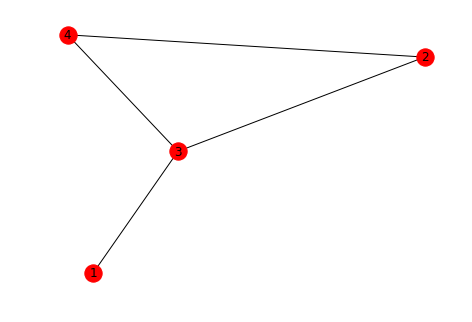

In [5]:
#disable the warnings
import warnings
warnings.filterwarnings("ignore")

nx.draw(G,with_labels=True)

### Layout

circular_layout： Position nodes on a circle<br>
random_layout  ： Position nodes uniformly at random in the unit square<br>
shell_layout   ： Position nodes in concentric circles<br>
spring_layout  ： Position nodes using Fruchterman-Reingold force-directed algorithm<br>
spectral_layout： Position nodes using the eigenvectors of the graph Laplacian<br>

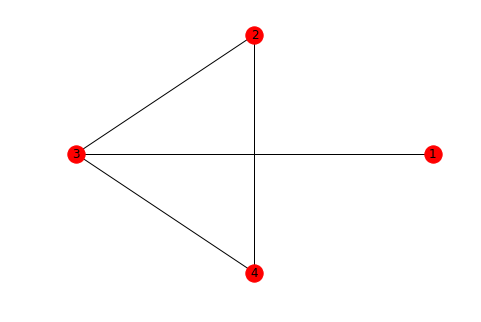

In [6]:
#setting
pos_cir = nx.circular_layout(G)
#draw
nx.draw(G,pos_cir,with_labels=True)

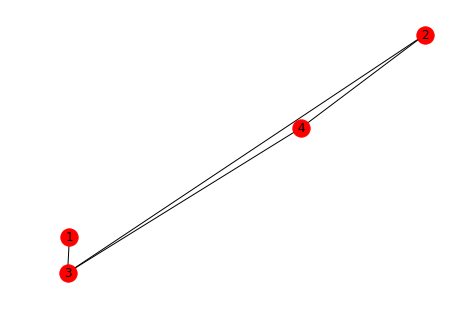

In [7]:
#setting
pos_cir = nx.random_layout(G)
#draw
nx.draw(G,pos_cir,with_labels=True)

### Another way to add nodes and edges

In [8]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(4,5), (4,2)])

In [9]:
print G.nodes()
print G.edges()

[1, 2, 3, 4, 5]
[(2, 4), (4, 5)]


### Path_Graph

In [10]:
H = nx.path_graph(10)

print H.node
print H.edge
print H[0], H[1], H[2]

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {4: {}, 6: {}}, 6: {5: {}, 7: {}}, 7: {8: {}, 6: {}}, 8: {9: {}, 7: {}}, 9: {8: {}}}
{1: {}} {0: {}, 2: {}} {1: {}, 3: {}}


### Edge Weight

In [11]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edge(2,3)
print G.edge

{1: {}, 2: {3: {}}, 3: {2: {}}}


In [12]:
G.add_edge(1,2,weight=3.1415)
print G.edge

{1: {2: {'weight': 3.1415}}, 2: {1: {'weight': 3.1415}, 3: {}}, 3: {2: {}}}


### Remove & Clear

In [13]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,4)
print G.edge


{1: {3: {}}, 2: {3: {}}, 3: {1: {}, 2: {}, 4: {}}, 4: {3: {}}}


In [14]:
G.remove_node(4)
print G.edge

{1: {3: {}}, 2: {3: {}}, 3: {1: {}, 2: {}}}


In [15]:
G.remove_edge(2,3)
print G.node
print G.edge

{1: {}, 2: {}, 3: {}}
{1: {3: {}}, 2: {}, 3: {1: {}}}


In [16]:
G.clear()
print G.node
print G.edge

{}
{}


### Directed Graphs

In [17]:
DG = nx.DiGraph()
DG.add_node(1)
DG.add_edge(2,3)
DG.add_edge(3,2)
print DG.edge

{1: {}, 2: {3: {}}, 3: {2: {}}}


In [18]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,0.75),(1,4,0.4)])
print DG.edge

{1: {2: {'weight': 0.5}, 4: {'weight': 0.4}}, 2: {}, 3: {1: {'weight': 0.75}}, 4: {}}


In [19]:
print DG.degree(1)   #outdegree:2 indegree:1
print DG.out_degree(1)
print DG.in_degree(1)
print DG.out_degree(1,weight='weight')  #the sum of the weight of node1's out degree
print DG.degree(1,weight='weight')      #the sum of the weight of node1'a out degree + in degree
print DG.neighbors(1)

3
2
1
0.9
1.65
[2, 4]


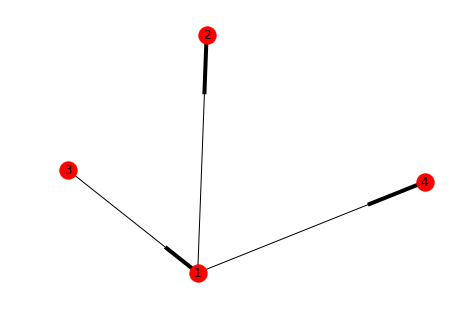

In [20]:
nx.draw(DG,with_labels=True)

### Accessing nodes

#### Use adjacency_iter() to visit all the node in graph<br> return (node,adjacencydict)

In [21]:
G = nx.Graph()
G.add_path([0,1,2,3])
print G.edge

{0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}}}


In [22]:
for n,nbrdict in G.adjacency_iter():
    print n,nbrdict

0 {1: {}}
1 {0: {}, 2: {}}
2 {1: {}, 3: {}}
3 {2: {}}


### Save your graph

In [23]:
import pickle
G = nx.path_graph(10)
pickle.dump(G,open('networkx_example.txt','w'))

In [24]:
G_load = pickle.load(open('networkx_example.txt'))
G_load.edge

{0: {1: {}},
 1: {0: {}, 2: {}},
 2: {1: {}, 3: {}},
 3: {2: {}, 4: {}},
 4: {3: {}, 5: {}},
 5: {4: {}, 6: {}},
 6: {5: {}, 7: {}},
 7: {6: {}, 8: {}},
 8: {7: {}, 9: {}},
 9: {8: {}}}

## Example: DFS

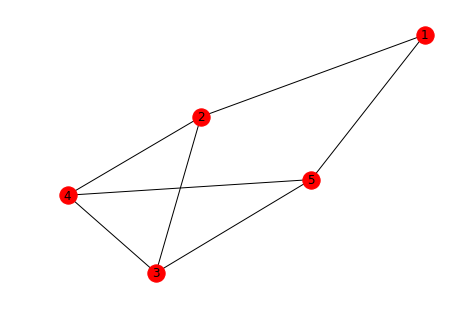

In [25]:
G = nx.Graph()  
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5), (5,3)])  
stack = [1]  # Start from node1  
visit_list = []  
nx.draw(G, with_labels=True)

In [26]:
while len(stack) > 0:  
    vnode = stack.pop()  
    if vnode not in visit_list:  
        print("\t[Info] Visit {0}...".format(vnode))  
        visit_list.append(vnode)  
    nbs = G.neighbors(vnode)  
    for nb in nbs:  
        if nb not in visit_list:  
            print("\t[Info] Put {0} in stack...".format(nb))  
            stack.append(nb)  
    print("\tStack list={0}".format(stack))  
    print("\tVisit list={0}".format(visit_list))  
    if len(visit_list) == len(G.nodes()): break  
  
print("\t[Info] Deep First Search has {0}".format(visit_list))  

	[Info] Visit 1...
	[Info] Put 2 in stack...
	[Info] Put 5 in stack...
	Stack list=[2, 5]
	Visit list=[1]
	[Info] Visit 5...
	[Info] Put 3 in stack...
	[Info] Put 4 in stack...
	Stack list=[2, 3, 4]
	Visit list=[1, 5]
	[Info] Visit 4...
	[Info] Put 2 in stack...
	[Info] Put 3 in stack...
	Stack list=[2, 3, 2, 3]
	Visit list=[1, 5, 4]
	[Info] Visit 3...
	[Info] Put 2 in stack...
	Stack list=[2, 3, 2, 2]
	Visit list=[1, 5, 4, 3]
	[Info] Visit 2...
	Stack list=[2, 3, 2]
	Visit list=[1, 5, 4, 3, 2]
	[Info] Deep First Search has [1, 5, 4, 3, 2]


## Social Network Measure

### Shorest Path

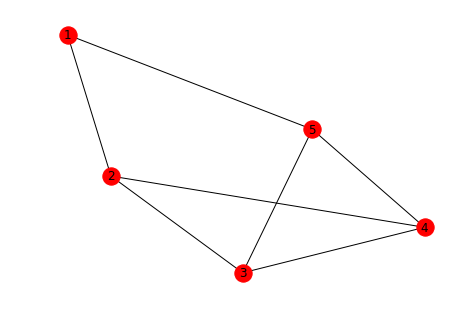

In [27]:
G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5)])  
nx.draw(G,with_labels=True)


In [28]:
p = nx.shortest_path(G)
print p[1][3]
print p[2][4]
print p[1][4]

[1, 2, 3]
[2, 4]
[1, 2, 4]


### Degree Centrality

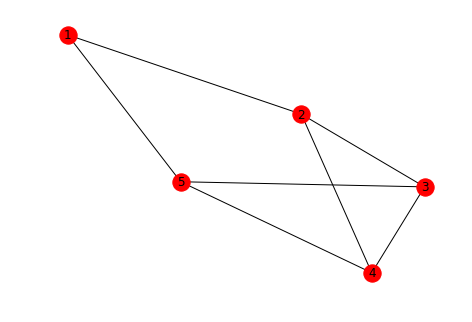

In [29]:
G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5)])  
nx.draw(G,with_labels=True)

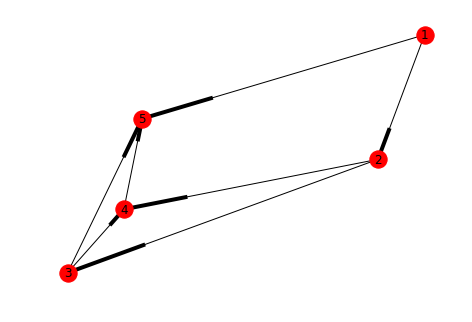

In [30]:
DG = nx.DiGraph()
DG.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5)])
nx.draw(DG,with_labels=True)

In [31]:
#degree centrality
d_c = nx.degree_centrality(G)
print d_c


{1: 0.5, 2: 0.75, 3: 0.75, 4: 0.75, 5: 0.75}


In [32]:
#in-degree centrality
in_dc = nx.in_degree_centrality(DG)
print in_dc
#out-degree centrality
out_dc = nx.out_degree_centrality(DG)
print out_dc

{1: 0.0, 2: 0.25, 3: 0.25, 4: 0.5, 5: 0.75}
{1: 0.5, 2: 0.5, 3: 0.5, 4: 0.25, 5: 0.0}


### Betweenness Centrality

In [33]:
b_c = nx.betweenness_centrality(G)
print b_c

{1: 0.05555555555555555, 2: 0.16666666666666666, 3: 0.05555555555555555, 4: 0.05555555555555555, 5: 0.16666666666666666}


### Closeness_centrality

In [34]:
c_c = nx.closeness_centrality(G)
print c_c

{1: 0.6666666666666666, 2: 0.8, 3: 0.8, 4: 0.8, 5: 0.8}


### Eigenvector_centrality

In [35]:
e_c = nx.eigenvector_centrality(G)
print e_c

{1: 0.31921248557590204, 2: 0.4557981294910591, 3: 0.49122271901722836, 4: 0.49122271901722836, 5: 0.4557981294910591}


### Clique

[[1], [2], [3], [4], [5], [1, 2], [1, 5], [2, 3], [2, 4], [3, 4], [3, 5], [4, 5], [2, 3, 4], [3, 4, 5]]
1 clique: [[1], [2], [3], [4], [5]]
2 clique: [[1, 2], [1, 5], [2, 3], [2, 4], [3, 4], [3, 5], [4, 5]]
3 clique: [[2, 3, 4], [3, 4, 5]]


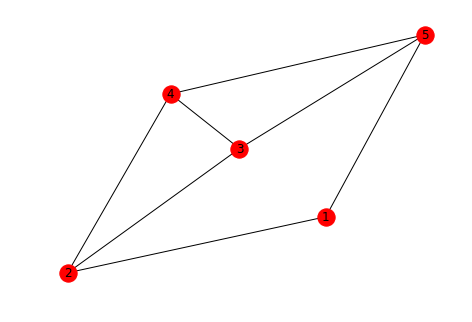

In [36]:
nx.draw(G,with_labels=True)
cliques = list(nx.enumerate_all_cliques(G))
print cliques
for i in range(1,len(max(cliques, key=len))+1):
    print i,"clique:", [x for x in cliques if len(x)==i]


In [37]:
node_cliques = nx.cliques_containing_node(G,nodes=1)
print(node_cliques)

[[2, 1], [5, 1]]


### Triangle, Transitivity, Clustering Coefficient

In [38]:
print nx.triangles(G)  
print nx.transitivity(G)
print nx.clustering(G)

{1: 0, 2: 1, 3: 2, 4: 2, 5: 1}
0.461538461538
{1: 0.0, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.3333333333333333}


## Comunity

https://github.com/taynaud/python-louvain

In [39]:
import community

G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,4), (3,4), (3,5), (4,5)])  
partition = community.best_partition(G)
print partition

{1: 0, 2: 0, 3: 1, 4: 1, 5: 1}


{1: Text(0.419198,1,u'1'),
 2: Text(0,0.69247,u'2'),
 3: Text(0.84122,0,u'3'),
 4: Text(0.368364,0.237871,u'4'),
 5: Text(0.749293,0.519368,u'5')}

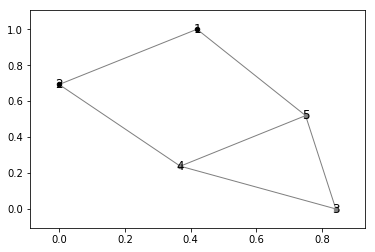

In [40]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
labels = {}    
for node in G.nodes():
    labels[node] = node
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(com / size))
nx.draw_networkx_edges(G,pos, alpha=0.5)
nx.draw_networkx_labels(G,pos,labels)

In [41]:
print community.modularity(partition,G)

0.111111111111
